In [75]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from tqdm import tqdm 
import matplotlib.animation as anim
from scipy.signal import argrelextrema
from scipy.interpolate import splrep,splint,splev,BSpline,sproot,splprep,bisplrep,bisplev

In [76]:
class Particle():
    
    # init
    def __init__(self, r0,v0,a0,t,m,radius,Id):
        
        self.dt  = t[1] - t[0]
        
        self.r = r0
        self.v = v0
        self.a = a0
        
        self.rVector = np.zeros( (len(t),len(r0)) )
        self.vVector = np.zeros( (len(t),len(v0)) )
        self.aVector = np.zeros( (len(t),len(a0)) )
        
        self.m = m
        self.radius = radius
        self.Id = Id
        
    # Method
    def Evolution(self,i):
        
        self.SetPosition(i,self.r)
        self.SetVelocity(i,self.v)
        
       # print(self.r)
        
        # Euler method
        self.r += self.dt * self.v + (1/2)*self.a*(self.dt)**2
        self.v += self.dt * self.a
    
    def CheckWallLimits(self,limits,e,dim):
        
        for i in range(dim):
            
            if self.r[i] + self.radius > limits[i]:
                self.v[i] = -e*self.v[i]
                self.r[i] = limits[i] - self.radius
                
            if self.r[i] - self.radius < - limits[i]:
                self.v[i] = -e*self.v[i]
                self.r[i] = -limits[i] + self.radius
    
    # Setters
    
    def SetPosition(self,i,r):
        self.rVector[i] = r
        
    def SetVelocity(self,i,v):
        self.vVector[i] = v
        
    # Getters  
    def GetPositionVector(self):
        return self.rVector
    
    def GetRPositionVector(self):
        return self.RrVector 
    
    def GetVelocityVector(self):
        return self.vVector
    
    def GetRVelocityVector(self):
        return self.RvVector
    
    def GetR(self):
        return self.radius
    
    def ReduceSize(self,factor):
        
        self.RrVector = np.array([self.rVector[0]]) # initial condition
        self.RvVector = np.array([self.vVector[0]]) # initial condition
        
        for i in range(1,len(self.rVector)):
            if i%factor == 0:
                self.RrVector = np.vstack([self.RrVector,self.rVector[i]])
                self.RvVector = np.vstack([self.RvVector,self.vVector[i]])
                            
               # print(self.RrVector)

In [77]:
# Discretization
dt = 0.01
tmax = 30
t = np.arange(0,tmax+dt,dt)


In [78]:
x0 = np.array( [-15.,5.] )
v0 = np.array( [1.,0.] )
a0 = np.array( [0.,-9.8] )
        
p = Particle(x0,v0,a0,t,1.,1.0,1)

In [79]:
Limits = np.array([20.,20.])

In [80]:
def RunSimulation(t):
    
    particle = p
    
    for it in tqdm(range(len(t))): # Evolucion temporal
            
        particle.CheckWallLimits(Limits,0.9,2)
        particle.Evolution(it)
        
        
    return particle

In [81]:
Particles = RunSimulation(t)

100%|███████████████████████████████████████████████████████████████████████████| 3001/3001 [00:00<00:00, 28934.35it/s]


In [82]:
def ReduceTime(t,factor):
    
    Particles.ReduceSize(factor)
        
    Newt = []
    
    for i in range(len(t)):
        if i%factor == 0:
            Newt.append(t[i])
            
    return np.array(Newt)

In [83]:
redt = ReduceTime(t,10)

# Caida con restitución

Itere los primeros 30 segundos con un paso temporal de $\Delta t = 0.01$.

<IPython.core.display.Javascript object>


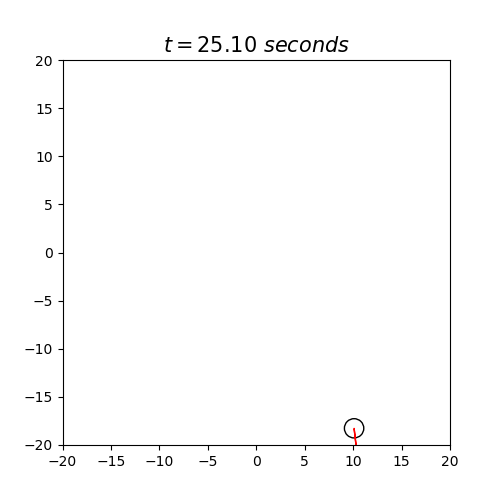

In [84]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)


def init():
    ax.set_xlim(-Limits[0],Limits[0])
    ax.set_ylim(-Limits[1],Limits[1])

def Update(i):
    
    plot = ax.clear()
    init()
    plot = ax.set_title(r'$t=%.2f \ seconds$' %(redt[i]), fontsize=15)
    
    x = Particles.GetRPositionVector()[i,0]
    y = Particles.GetRPositionVector()[i,1]
        
    vx = Particles.GetRVelocityVector()[i,0]
    vy = Particles.GetRVelocityVector()[i,1]
        
    circle = plt.Circle( (x,y), Particles.GetR(), color='k', fill=False)
    plot = ax.add_patch(circle)
    plot = ax.arrow(x,y,vx,vy,color='r',head_width=0.5)
        
    return plot

Animation = anim.FuncAnimation(fig,Update,frames=len(redt),init_func=init)

a) ¿Que tiempo tarda la pelota en dejar de rebotar? Haga su mejor estimación.

In [85]:
x = np.linspace(0,40,100)

In [86]:
def Lagrange(x,xi,i,n):
    
    prod = 1.0
    
    for j in range(n+1): #tengo n+1 puntos 
        if i!=j:
            prod *= (x-xi[j])/(xi[i]-xi[j])
            
    return prod

In [87]:
def Poly(x,xi,fxi,n):
    
    summ = 0.
    
    for i in range(n+1):
        
        summ += fxi[i]*Lagrange(x,xi,i,n)
        
    return summ

In [89]:
px2 = Poly(x,tt,a,2)

NameError: name 'a' is not defined

In [90]:
tck1=splrep(tt,a,k=1)
t,c,k=tck1
L1=BSpline(t,c,k)

NameError: name 'tt' is not defined

<IPython.core.display.Javascript object>


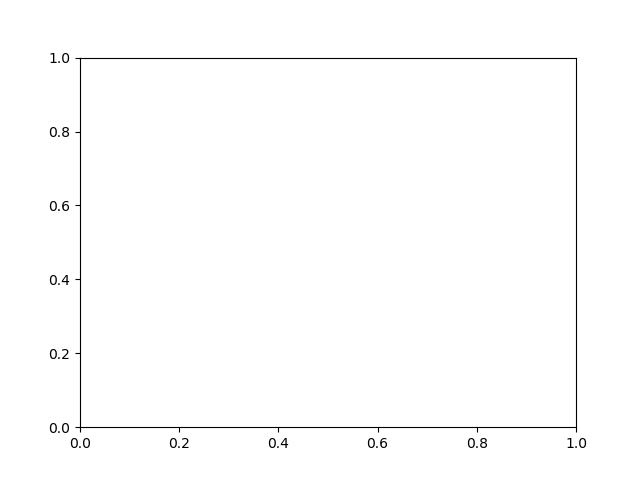

NameError: name 'tt' is not defined

In [91]:
fig, ax1 = plt.subplots()
plt.scatter(tt,a,color='r')
#plt.plot(x,px2)
plt.plot(x,L1(x),alpha=0.5,linewidth=2)
ax1 = plt.gca()
plt.show()
ax1.set_xlabel('t[s]')
ax1.set_ylabel('h[m]')
ax1.set_title('Estimación del tiempo rebote')

In [ ]:
El tiempo que tarda la pelota en dejar de rebotar es aproximadamente $\approx 40 s$ 

b) Dibuje la energía mecánica de la pelota como una función del tiempo.

In [59]:
def enpotencial(m,g,h):
    u = m*g*abs(h)
    return u

In [60]:
EnergiasU = []
l = len(p.GetRPositionVector())
for i in range(l):
    u = enpotencial(1,9.8,p.GetRPositionVector()[i,1])
    EnergiasU.append(u)
EnergiasU = np.array(EnergiasU)


In [61]:
def encinetica(m,v):
    k = 1/2*(m*(v**2))
    return k

In [62]:
EnergiasK = []
ll = len(p.GetRVelocityVector())
for i in range(ll):
    k = encinetica(1,p.GetRVelocityVector()[i,1])
    EnergiasK.append(k)
EnergiasK = np.array(EnergiasK)


In [92]:
EnMecanica = np.array(EnergiasK+EnergiasU)


In [95]:
plt.plot(redt, EnMecanica)
plt.grid()
plt.show()

ValueError: x and y must have same first dimension, but have shapes (301,) and (151,)